In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
cols = list(df.columns[df.dtypes == 'object'])
for col in cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

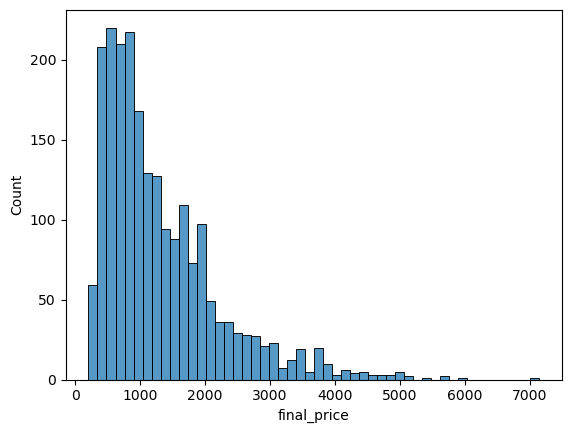

In [9]:
sns.histplot(df.final_price, bins=50)
plt.show()

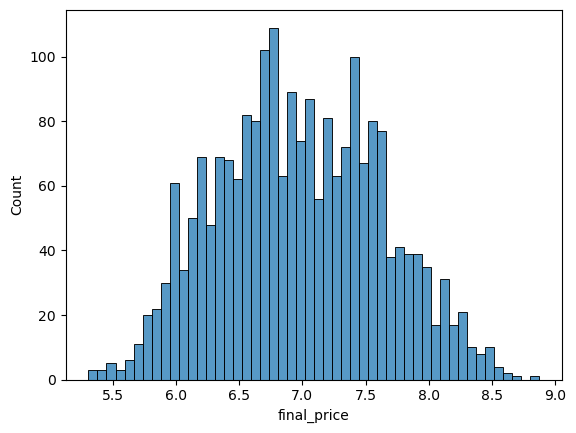

In [10]:
price_logs = np.log1p(df.final_price)
sns.histplot(price_logs, bins=50)
plt.show()

In [11]:
df.isnull().any()

laptop          False
status          False
brand           False
model           False
cpu             False
ram             False
storage         False
storage_type     True
gpu              True
screen           True
touch           False
final_price     False
dtype: bool

In [12]:
df.ram.median()

16.0

In [13]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [14]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


In [16]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [17]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [18]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [19]:
len(y_train), len(y_val), len(y_test)

(1296, 432, 432)

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [21]:
base = ['ram', 'storage', 'screen']

In [22]:
def prepare_X_zero(df):
    df = df.copy()

    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [23]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [25]:
rmse(y_train, y_pred)

0.44632651855038796

In [26]:
X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)

In [27]:
def prepare_X_mean(df):
    df = df.copy()

    df_num = df[base]
    for col in base:
        df_num[col] = df_num[col].fillna(df_num[col].mean())
    X = df_num.values
    return X

In [28]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

/var/folders/yp/p3jwvbp95_dcv87rgs5yw0yr0000gn/T/ipykernel_6843/2978741436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].fillna(df_num[col].mean())


0.4460856669097624

In [29]:
X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)

/var/folders/yp/p3jwvbp95_dcv87rgs5yw0yr0000gn/T/ipykernel_6843/2978741436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].fillna(df_num[col].mean())


In [30]:
round(score_zero, 2), round(score_mean, 2)

(0.43, 0.43)

In [31]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [32]:
X_train = prepare_X_zero(df_train)

regs = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in regs:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    rms = rmse(y_train, y_pred)
    print(r, rms)

0 0.44632651855038796
0.01 0.44632687651684255
0.1 0.4463617286354738
1 0.44932370862151916
5 0.48656392262562465
10 0.5348065324681563
100 0.7118451710245166


In [33]:
for col in cols:
    print(col, df[col].value_counts())
    print()

laptop laptop
asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"               1
hp_elitebook_640_g9_intel_core_i5-1235u/8gb/512gb_ssd/14"                                 1
hp_pavilion_x360_14-ek0018ns_intel_core__i5-1235u/8gb/512gb_ssd/14"_táctil                1
hp_pavilion_15-eh1001ns_amd_ryzen_5_5500u/16gb/512gb_ssd/15.6"                            1
hp_pavilion_14-dv1009ns_intel_core_i5-1155g7/16gb/512gb_ssd/14"                           1
                                                                                         ..
microsoft_surface_pro_9_platino_intel_evo_core_i7-1255u/16gb/1tb_ssd/13"_táctil           1
hp_15s-fq5044ns_intel_core_i7-1255u/8gb/512gb_ssd/15.6"                                   1
denver_electronics_nbd-14105ssdes_intel_celeron_n4020/4gb/64gb+256gb_ssd/14"              1
asus_tuf_gaming_f15_tuf507zc4-hn040_intel_core_i7-12700h/16gb/512gb_ssd/rtx_3050/15.6"    1
razer_book_fhd+_intel_evo_core_i7-1165g7/16gb/256gb_ssd/13.4"_táct

In [34]:
cols

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [35]:
categorical_columns = ['status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']
categorical = {}
for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
categorical

{'status': ['new', 'refurbished'],
 'brand': ['asus', 'lenovo', 'hp', 'msi', 'acer'],
 'model': ['vivobook', 'rog', 'thinkpad', '15s', 'ideapad'],
 'cpu': ['intel_core_i7',
  'intel_core_i5',
  'amd_ryzen_7',
  'amd_ryzen_5',
  'intel_core_i3'],
 'storage_type': ['ssd', 'emmc'],
 'gpu': ['rtx_3050', 'rtx_3060', 'rtx_3070', 'rtx_4060', 'rtx_3080'],
 'touch': ['no', 'yes']}

In [36]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
X_train = prepare_X(df_train)

regs = [0, 0.01, 1, 10, 100]

for r in regs:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    rms = rmse(y_train, y_pred)
    print(r, rms)

0 6.514950818705657
0.01 0.35810259757063173
1 0.3595546663249962
10 0.40410507339979607
100 0.5893728315953748


In [38]:
w0, w = train_linear_regression_reg(X_train, y_train, 0.01)

In [39]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3513385978098294

In [40]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [41]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3481748390141484

In [42]:
laptop = df_test.iloc[20].to_dict()
df_small = pd.DataFrame([laptop])
df_small

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,asus_vivobook_15_f1500ea-ej3167w_intel_core_i5...,new,asus,vivobook,intel_core_i5,8,512,ssd,NaN,15.6,no


In [43]:
X_small = prepare_X(df_small)

In [44]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

6.533490274572418

In [45]:
np.expm1(y_pred)

686.7946190688191

In [46]:
y_test[20]

6.220590170099739

In [47]:
np.expm1(y_test[20])

502.0

In [48]:
def split_df(df, seed):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [49]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

In [50]:
for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_df(df, seed)
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))
scores

[565.4520868771004,
 636.798542305673,
 588.9558697907955,
 597.8148920012511,
 571.9627915111033,
 573.2383256618967,
 647.3438328407198,
 550.4398184485973,
 587.3335036169941,
 576.1017929433127]

In [51]:
round(np.std(scores), 3)

29.176

In [52]:
df_train, df_val, df_test, y_train, y_val, y_test = split_df(df, 9)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X_zero(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049564